In [1]:
import pandas as pd

In [2]:
cov_data = pd.read_csv('./worldwide_covid_data.csv')

In [3]:
vax_rate = pd.read_csv('./COVID-19_vaccination_rates.csv')

In [4]:
vax_rate = vax_rate[['location', 'people_fully_vaccinated_per_hundred']].groupby(['location']).max()
vax_rate

,people_fully_vaccinated_per_hundred
location,
Afghanistan,8.95
Africa,7.72
Albania,34.15
Algeria,12.08
Andorra,64.04
...,...
Wallis and Futuna,53.39
World,45.05
Yemen,1.20


In [5]:
cov_deaths = cov_data.rename(columns={'Country':'location'})[['location','Deaths/1M population']].set_index('location')
cov_deaths

,Deaths/1M population
location,
Afghanistan,182
Albania,1034
Algeria,133
Andorra,1679
Angola,50
...,...
Venezuela,176
Vietnam,230
Yemen,62


In [6]:
df = pd.merge(vax_rate, cov_deaths, left_index=True, right_index=True).rename(columns={'Deaths/1M population': 'deaths_per_million'})
df

,people_fully_vaccinated_per_hundred,deaths_per_million
location,,
Afghanistan,8.95,182
Albania,34.15,1034
Algeria,12.08,133
Andorra,64.04,1679
Angola,9.67,50
...,...,...
Venezuela,34.34,176
Vietnam,56.54,230
Yemen,1.20,62


In [7]:
import matplotlib.pyplot as plt

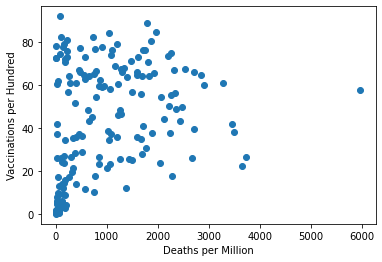

In [9]:
plt.scatter(df['deaths_per_million'], df['people_fully_vaccinated_per_hundred'])
plt.xlabel('Deaths per Million')
plt.ylabel('Vaccinations per Hundred')
plt.show()

# Idea: Limit countries to ones that have unlimited acc